In [10]:
import os
import numpy as np
import pandas as pd
import torch
import os
import json
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
from tqdm import tqdm
import glob
import pickle
import glob
import os.path as osp
DATA_DIR = '/mnt/chicm/data/open-images/relation'
DETECT_DATA_DIR = '/mnt/chicm/data/open-images/detect'
IMG_DIR = '/mnt/chicm/data/open-images/train/imgs'

In [19]:
img_files = glob.glob(IMG_DIR + '/**/*.jpg')
fullpath_dict = {}
for fn in img_files:
    fullpath_dict[osp.basename(fn).split('.')[0]] = fn

In [12]:
fullpath_dict['780d8a470d144fa0']

'train_7/780d8a470d144fa0.jpg'

In [8]:
!ls $DATA_DIR

challenge-2019-attributes-description.csv
challenge-2019-classes-vrd.csv
challenge-2019-relationships-description.csv
challenge-2019-relationship-triplets.csv
challenge-2019-train-vrd-bbox.csv
challenge-2019-train-vrd.csv
challenge-2019-train-vrd-labels.csv
challenge-2019-validation-vrd-bbox.csv
challenge-2019-validation-vrd.csv
challenge-2019-validation-vrd-labels.csv
top_classes.csv
VRD_sample_submission.csv


In [107]:
df_box = pd.read_csv(os.path.join(DATA_DIR, 'challenge-2019-train-vrd-bbox.csv'), dtype={'XMin':str, 'XMax':str, 'YMin': str, 'YMax': str})
df_box.head()

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf
0,780d8a470d144fa0,/m/04yx4,0.000000,0.527143,0.029979,0.997859,0
1,780d8a470d144fa0,/m/04yx4,0.291429,0.687143,0.128480,0.997859,0
2,780d8a470d144fa0,/m/04yx4,0.590000,0.965714,0.164882,0.997859,0
3,780db0a7d07a4a20,/m/026t6,0.000000,1.000000,0.345625,0.990000,-1
4,780db0a7d07a4a20,/m/026t6,0.271667,0.626667,0.803125,0.999375,0


In [108]:
x = df_box.ImageID + '_' + df_box.LabelName + '_' + df_box.XMin
x

0            780d8a470d144fa0_/m/04yx4_0.000000
1            780d8a470d144fa0_/m/04yx4_0.291429
2            780d8a470d144fa0_/m/04yx4_0.590000
3            780db0a7d07a4a20_/m/026t6_0.000000
4            780db0a7d07a4a20_/m/026t6_0.271667
5            780db0a7d07a4a20_/m/026t6_0.562500
6            780db0a7d07a4a20_/m/026t6_0.645000
7            780db0a7d07a4a20_/m/0hg7b_0.266667
8            780db0a7d07a4a20_/m/0hg7b_0.500000
9            780db1d52d5aee6c_/m/04yx4_0.441250
10           780dc0ff229f14f1_/m/04yx4_0.722500
11         780dc0ff229f14f1_/m/0bwd_0j_0.506250
12         780dc0ff229f14f1_/m/0bwd_0j_0.107500
13         780dc0ff229f14f1_/m/0bwd_0j_0.209375
14         780dc0ff229f14f1_/m/0bwd_0j_0.392500
15           780ddae87e5cd792_/m/04yx4_0.000000
16           780ddae87e5cd792_/m/04yx4_0.047842
17            780df154f3f66fc2_/m/0k4j_0.000000
18            780df154f3f66fc2_/m/0k4j_0.000000
19         780df7cd6a682fd9_/m/03bt1vf_0.000000
20         780df7cd6a682fd9_/m/03bt1vf_0

In [115]:
df_vrd = pd.read_csv(os.path.join(DATA_DIR, 'challenge-2019-train-vrd.csv'), converters={
    'XMin1':lambda x: '{:.6f}'.format(float(x)),
    'XMax1':lambda x: '{:.6f}'.format(float(x)),
    'YMin1':lambda x: '{:.6f}'.format(float(x)),
    'YMax1':lambda x: '{:.6f}'.format(float(x))})
df_vrd.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.005000,0.033125,0.580000,0.627778,0.00500,0.033125,0.580000,0.627778,is
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n,0.612000,0.735000,0.418919,0.950450,0.61200,0.735000,0.418919,0.950450,is
2,b54d41beabcfd900,/m/01mzpv,/m/083vt,0.372500,0.399375,0.706413,0.778557,0.37250,0.399375,0.706413,0.778557,is
3,4b6a08cc110d7275,/m/01mzpv,/m/01y9k5,0.171250,0.255625,0.557500,0.749167,0.20750,0.683125,0.611667,0.999167,at
4,0144cfbb726f4c72,/m/01mzpv,/m/04bcr3,0.855000,0.950000,0.561667,0.609167,0.82875,0.999375,0.568333,0.673333,at


In [112]:
df_vrd.loc[df_vrd.ImageID=='fe58ec1b06db2bb7']

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.005,0.033125,0.58,0.62777776,0.005000,0.033125,0.580000,0.627778,is
77712,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.071875,0.121875,0.5977778,0.68,0.071875,0.121875,0.597778,0.680000,is
171028,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.124375,0.2175,0.6122222,0.7122222,0.124375,0.217500,0.612222,0.712222,is
230777,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.185,0.308125,0.5933333,0.7688889,0.185000,0.308125,0.593333,0.768889,is
284575,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.51375,0.903125,0.68,0.9988889,0.513750,0.903125,0.680000,0.998889,is
362652,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.30875,0.5175,0.63222224,0.86444443,0.308750,0.517500,0.632222,0.864444,is
370350,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.038125,0.071875,0.5822222,0.6622222,0.038125,0.071875,0.582222,0.662222,is


In [113]:
df_box.loc[df_box.ImageID=='fe58ec1b06db2bb7']

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf
2055608,fe58ec1b06db2bb7,/m/04bcr3,0.185000,0.308125,0.593333,0.768889,0
2055609,fe58ec1b06db2bb7,/m/04bcr3,0.005000,0.033125,0.580000,0.627778,0
2055610,fe58ec1b06db2bb7,/m/04bcr3,0.038125,0.071875,0.582222,0.662222,0
2055611,fe58ec1b06db2bb7,/m/04bcr3,0.071875,0.121875,0.597778,0.680000,0
2055612,fe58ec1b06db2bb7,/m/04bcr3,0.124375,0.217500,0.612222,0.712222,0
2055613,fe58ec1b06db2bb7,/m/04bcr3,0.308750,0.517500,0.632222,0.864444,0
2055614,fe58ec1b06db2bb7,/m/04bcr3,0.513750,0.903125,0.680000,0.998889,0


In [15]:
df_vrd.shape

(374768, 12)

In [16]:
df_vrd.loc[df_vrd.RelationshipLabel=='is'].shape

(194142, 12)

In [8]:
print(df_vrd.shape, len(df_vrd.ImageID.unique()), len(df_vrd.LabelName1.unique()),\
      len(df_vrd.LabelName2.unique()), len(df_vrd.RelationshipLabel.unique()))

(374768, 12) 100522 32 58 10


In [41]:
df_classes = pd.read_csv(osp.join(DATA_DIR, 'challenge-2019-classes-vrd.csv'), names=['classes', 'desc'])
df_classes.head()

,classes,desc
0,/m/05r5c,Piano
1,/m/01599,Beer
2,/m/01_5g,Chopsticks
3,/m/01yrx,Cat
4,/m/04_sv,Motorcycle


In [43]:
df_att = pd.read_csv(osp.join(DATA_DIR, 'challenge-2019-attributes-description.csv'), names=['classes', 'desc'])
df_att.head()

,classes,desc
0,/m/02gy9n,Transparent
1,/m/05z87,Plastic
2,/m/0dnr7,(made of)Textile
3,/m/04lbp,(made of)Leather
4,/m/083vt,Wooden


In [50]:
def get_class_name(label):
    return df_classes.loc[df_classes.classes==label].desc.values[0]

def get_att_name(label):
    return df_att.loc[df_att.classes==label].desc.values[0]

In [77]:
def show_is_relation(idx):
    row = df_vrd.loc[df_vrd.RelationshipLabel=='is'].iloc[idx]
    fn = fullpath_dict[row.ImageID]
    #img = Image.open(fn)
    img = cv2.cvtColor(cv2.imread(fn), cv2.COLOR_BGR2RGB)
    print(img.shape)
    h, w, _ = img.shape
    x1, x2, y1, y2 = int(row.XMin1*w), int(row.XMax1*w), int(row.YMin1*h), int(row.YMax1*h)
    crop_img = img[y1:y2, x1:x2, :]
    
    print(get_class_name(row.LabelName1), get_att_name(row.LabelName2))
    
    #crop_img = cv2.resize(crop_img, (224, 224))
    
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(crop_img)

(683, 1024, 3)
Guitar Wooden


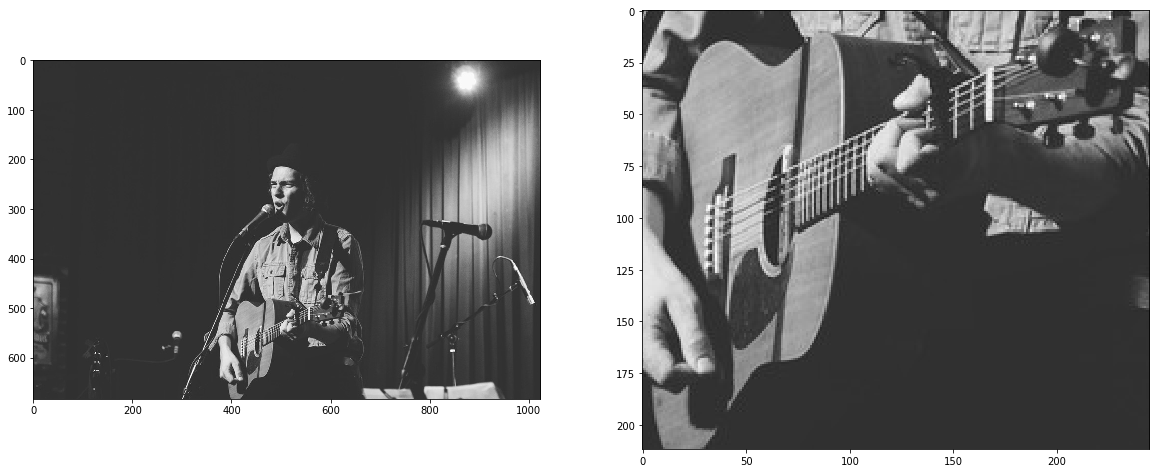

In [84]:
show_is_relation(2005)

In [8]:
df_vrd.loc[df_vrd.ImageID=='fe58ec1b06db2bb7']

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.005000,0.033125,0.580000,0.627778,0.005000,0.033125,0.580000,0.627778,is
77712,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.071875,0.121875,0.597778,0.680000,0.071875,0.121875,0.597778,0.680000,is
171028,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.124375,0.217500,0.612222,0.712222,0.124375,0.217500,0.612222,0.712222,is
230777,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.185000,0.308125,0.593333,0.768889,0.185000,0.308125,0.593333,0.768889,is
284575,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.513750,0.903125,0.680000,0.998889,0.513750,0.903125,0.680000,0.998889,is
362652,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.308750,0.517500,0.632222,0.864444,0.308750,0.517500,0.632222,0.864444,is
370350,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.038125,0.071875,0.582222,0.662222,0.038125,0.071875,0.582222,0.662222,is


In [63]:
df_vrd['labels'] = df_vrd.LabelName1.str.cat(df_vrd.LabelName2, sep=' ')
df_vrd.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel,labels
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.00500,0.033125,0.580000,0.627778,0.00500,0.033125,0.580000,0.627778,is,/m/04bcr3 /m/083vt
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n,0.61200,0.735000,0.418919,0.950450,0.61200,0.735000,0.418919,0.950450,is,/m/04dr76w /m/02gy9n
2,b54d41beabcfd900,/m/01mzpv,/m/083vt,0.37250,0.399375,0.706413,0.778557,0.37250,0.399375,0.706413,0.778557,is,/m/01mzpv /m/083vt
3,4b6a08cc110d7275,/m/01mzpv,/m/01y9k5,0.17125,0.255625,0.557500,0.749167,0.20750,0.683125,0.611667,0.999167,at,/m/01mzpv /m/01y9k5
4,0144cfbb726f4c72,/m/01mzpv,/m/04bcr3,0.85500,0.950000,0.561667,0.609167,0.82875,0.999375,0.568333,0.673333,at,/m/01mzpv /m/04bcr3


In [65]:
len(df_vrd.loc[df_vrd.RelationshipLabel=='is'].labels.unique())

42

In [66]:
df_vrd.loc[df_vrd.RelationshipLabel=='is'].labels.value_counts()

/m/04bcr3 /m/083vt      43161
/m/01mzpv /m/083vt      36632
/m/01mzpv /m/05z87      21875
/m/04dr76w /m/02gy9n    19356
/m/0342h /m/083vt       13444
/m/01mzpv /m/04lbp      11949
/m/04dr76w /m/05z87      7914
/m/01y9k5 /m/083vt       7472
/m/0cvnqh /m/083vt       5037
/m/04bcr3 /m/05z87       4981
/m/078n6m /m/083vt       3053
/m/026t6 /m/083vt        2906
/m/07y_7 /m/083vt        2550
/m/080hkjn /m/0dnr7      2395
/m/03m3pdh /m/0dnr7      1494
/m/080hkjn /m/04lbp      1425
/m/03ssj5 /m/083vt       1370
/m/01940j /m/0dnr7       1205
/m/04bcr3 /m/02gy9n       833
/m/05r5c /m/083vt         822
/m/03m3pdh /m/04lbp       635
/m/01s55n /m/0dnr7        535
/m/01_5g /m/083vt         509
/m/05r5c /m/05z87         360
/m/078n6m /m/02gy9n       335
/m/078n6m /m/05z87        308
/m/071p9 /m/083vt         204
/m/01s55n /m/04lbp        194
/m/0584n8 /m/0dnr7        153
/m/0cmx8 /m/05z87         151
/m/01s55n /m/05z87        138
/m/0584n8 /m/04lbp        137
/m/02p5f1q /m/05z87       133
/m/02jvh9 

In [9]:
df_box.loc[df_box.ImageID=='fe58ec1b06db2bb7']

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf
2055608,fe58ec1b06db2bb7,/m/04bcr3,0.185000,0.308125,0.593333,0.768889,0
2055609,fe58ec1b06db2bb7,/m/04bcr3,0.005000,0.033125,0.580000,0.627778,0
2055610,fe58ec1b06db2bb7,/m/04bcr3,0.038125,0.071875,0.582222,0.662222,0
2055611,fe58ec1b06db2bb7,/m/04bcr3,0.071875,0.121875,0.597778,0.680000,0
2055612,fe58ec1b06db2bb7,/m/04bcr3,0.124375,0.217500,0.612222,0.712222,0
2055613,fe58ec1b06db2bb7,/m/04bcr3,0.308750,0.517500,0.632222,0.864444,0
2055614,fe58ec1b06db2bb7,/m/04bcr3,0.513750,0.903125,0.680000,0.998889,0


In [22]:
df_vrd.RelationshipLabel.value_counts()

is                194142
at                111493
on                 31604
holds              20986
plays               8932
interacts_with      3756
inside_of           2392
wears                836
hits                 593
under                 34
Name: RelationshipLabel, dtype: int64

In [25]:
df_vrd.loc[df_vrd.RelationshipLabel=='is'].LabelName2.value_counts()

/m/083vt     117165
/m/05z87      36140
/m/02gy9n     20644
/m/04lbp      14411
/m/0dnr7       5782
Name: LabelName2, dtype: int64

In [89]:
df_vrd.loc[df_vrd.RelationshipLabel=='is'].shape

(194142, 12)

In [87]:
is_labels_1 = df_vrd.loc[df_vrd.RelationshipLabel=='is'].LabelName1.unique()
is_labels_1

array(['/m/04bcr3', '/m/04dr76w', '/m/01mzpv', '/m/078n6m', '/m/0342h',
       '/m/03m3pdh', '/m/03ssj5', '/m/01_5g', '/m/01y9k5', '/m/0cvnqh',
       '/m/07y_7', '/m/071p9', '/m/05r5c', '/m/01940j', '/m/01s55n',
       '/m/080hkjn', '/m/026t6', '/m/02p5f1q', '/m/0cmx8', '/m/0dt3t',
       '/m/0584n8', '/m/04ctx', '/m/02jvh9'], dtype=object)

In [88]:
is_labels_2 = df_vrd.loc[df_vrd.RelationshipLabel=='is'].LabelName2.unique()
is_labels_2

array(['/m/083vt', '/m/02gy9n', '/m/05z87', '/m/04lbp', '/m/0dnr7'],
      dtype=object)

In [91]:
df_box.loc[df_box.LabelName.isin(set(is_labels_1))].shape

(363048, 7)

In [109]:
df_box_is = df_box.loc[df_box.LabelName.isin(set(is_labels_1))].copy()
df_box_is.head()

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf
3,780db0a7d07a4a20,/m/026t6,0.000000,1.000000,0.345625,0.990000,-1
4,780db0a7d07a4a20,/m/026t6,0.271667,0.626667,0.803125,0.999375,0
5,780db0a7d07a4a20,/m/026t6,0.562500,0.999167,0.816875,0.999375,0
6,780db0a7d07a4a20,/m/026t6,0.645000,0.790833,0.801875,0.853125,0
72,780e7ff74d4e3785,/m/026t6,0.623438,0.890625,0.263775,0.656506,0


In [123]:
df_box_is['box_id'] = df_box_is.ImageID + '_' + df_box_is.LabelName + '_' + df_box_is.XMin + '_' + df_box_is.XMax + '_' + df_box_is.YMin + '_' + df_box_is.YMax
df_box_is.head()

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf,box_id
3,780db0a7d07a4a20,/m/026t6,0.000000,1.000000,0.345625,0.990000,-1,780db0a7d07a4a20_/m/026t6_0.000000_1.000000_0....
4,780db0a7d07a4a20,/m/026t6,0.271667,0.626667,0.803125,0.999375,0,780db0a7d07a4a20_/m/026t6_0.271667_0.626667_0....
5,780db0a7d07a4a20,/m/026t6,0.562500,0.999167,0.816875,0.999375,0,780db0a7d07a4a20_/m/026t6_0.562500_0.999167_0....
6,780db0a7d07a4a20,/m/026t6,0.645000,0.790833,0.801875,0.853125,0,780db0a7d07a4a20_/m/026t6_0.645000_0.790833_0....
72,780e7ff74d4e3785,/m/026t6,0.623438,0.890625,0.263775,0.656506,0,780e7ff74d4e3785_/m/026t6_0.623438_0.890625_0....


In [126]:
df_vrd_is = df_vrd.loc[df_vrd.RelationshipLabel=='is'].copy()
df_vrd_is.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel,box_id
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.005000,0.033125,0.580000,0.627778,0.005000,0.033125,0.580000,0.627778,is,fe58ec1b06db2bb7_/m/04bcr3_0.005000_0.033125_0...
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n,0.612000,0.735000,0.418919,0.950450,0.612000,0.735000,0.418919,0.950450,is,82d16a22f703df5c_/m/04dr76w_0.612000_0.735000_...
2,b54d41beabcfd900,/m/01mzpv,/m/083vt,0.372500,0.399375,0.706413,0.778557,0.372500,0.399375,0.706413,0.778557,is,b54d41beabcfd900_/m/01mzpv_0.372500_0.399375_0...
8,9a87b10b780dd7e6,/m/01mzpv,/m/083vt,0.556875,0.659375,0.714822,0.826454,0.556875,0.659375,0.714822,0.826454,is,9a87b10b780dd7e6_/m/01mzpv_0.556875_0.659375_0...
9,e4990b198db250d3,/m/01mzpv,/m/083vt,0.138750,0.199375,0.435833,0.505000,0.138750,0.199375,0.435833,0.505000,is,e4990b198db250d3_/m/01mzpv_0.138750_0.199375_0...


In [127]:
df_vrd_is['box_id'] = df_vrd_is.ImageID + '_' + df_vrd_is.LabelName1 + '_' + df_vrd_is.XMin1 + '_' + df_vrd_is.XMax1 + '_' + df_vrd_is.YMin1 + '_' + df_vrd_is.YMax1
df_vrd_is.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel,box_id
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.005000,0.033125,0.580000,0.627778,0.005000,0.033125,0.580000,0.627778,is,fe58ec1b06db2bb7_/m/04bcr3_0.005000_0.033125_0...
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n,0.612000,0.735000,0.418919,0.950450,0.612000,0.735000,0.418919,0.950450,is,82d16a22f703df5c_/m/04dr76w_0.612000_0.735000_...
2,b54d41beabcfd900,/m/01mzpv,/m/083vt,0.372500,0.399375,0.706413,0.778557,0.372500,0.399375,0.706413,0.778557,is,b54d41beabcfd900_/m/01mzpv_0.372500_0.399375_0...
8,9a87b10b780dd7e6,/m/01mzpv,/m/083vt,0.556875,0.659375,0.714822,0.826454,0.556875,0.659375,0.714822,0.826454,is,9a87b10b780dd7e6_/m/01mzpv_0.556875_0.659375_0...
9,e4990b198db250d3,/m/01mzpv,/m/083vt,0.138750,0.199375,0.435833,0.505000,0.138750,0.199375,0.435833,0.505000,is,e4990b198db250d3_/m/01mzpv_0.138750_0.199375_0...


In [134]:
df_train_is = df_box_is.set_index('box_id').join(df_vrd_is.set_index('box_id'), on='box_id', rsuffix='dfvrd')
df_train_is.head()

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf,ImageIDdfvrd,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
box_id,,,,,,,,,,,,,,,,,,,
780db0a7d07a4a20_/m/026t6_0.000000_1.000000_0.345625_0.990000,780db0a7d07a4a20,/m/026t6,0.000000,1.000000,0.345625,0.990000,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780db0a7d07a4a20_/m/026t6_0.271667_0.626667_0.803125_0.999375,780db0a7d07a4a20,/m/026t6,0.271667,0.626667,0.803125,0.999375,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780db0a7d07a4a20_/m/026t6_0.562500_0.999167_0.816875_0.999375,780db0a7d07a4a20,/m/026t6,0.562500,0.999167,0.816875,0.999375,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780db0a7d07a4a20_/m/026t6_0.645000_0.790833_0.801875_0.853125,780db0a7d07a4a20,/m/026t6,0.645000,0.790833,0.801875,0.853125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780e7ff74d4e3785_/m/026t6_0.623438_0.890625_0.263775_0.656506,780e7ff74d4e3785,/m/026t6,0.623438,0.890625,0.263775,0.656506,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
print(df_train_is.shape, df_box_is.shape, df_vrd_is.shape)

(376857, 19) (363048, 8) (194142, 13)


In [139]:
df_train_is.RelationshipLabel = df_train_is.RelationshipLabel.fillna('none')

In [140]:
df_train_is.sample(10)

,ImageID,LabelName,XMin,XMax,YMin,YMax,IsGroupOf,ImageIDdfvrd,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
box_id,,,,,,,,,,,,,,,,,,,
14c8646a2edbad78_/m/04bcr3_0.582500_0.628750_0.569167_0.608333,14c8646a2edbad78,/m/04bcr3,0.582500,0.628750,0.569167,0.608333,0,14c8646a2edbad78,/m/04bcr3,/m/083vt,0.582500,0.628750,0.569167,0.608333,0.5825,0.628750,0.569167,0.608333,is
47b0e5e9d1d5b1db_/m/01mzpv_0.056250_0.253750_0.667600_0.999066,47b0e5e9d1d5b1db,/m/01mzpv,0.056250,0.253750,0.667600,0.999066,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
6b1591f18ff1f889_/m/03m3pdh_0.000000_0.298125_0.456504_0.892295,6b1591f18ff1f889,/m/03m3pdh,0.000000,0.298125,0.456504,0.892295,0,6b1591f18ff1f889,/m/03m3pdh,/m/0dnr7,0.000000,0.298125,0.456504,0.892295,0.0000,0.298125,0.456504,0.892295,is
3e718a3366a09b0f_/m/01mzpv_0.262695_0.902344_0.429619_0.780059,3e718a3366a09b0f,/m/01mzpv,0.262695,0.902344,0.429619,0.780059,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
9920ce2c5e89c0b8_/m/01mzpv_0.045000_0.370833_0.290000_0.681875,9920ce2c5e89c0b8,/m/01mzpv,0.045000,0.370833,0.290000,0.681875,0,9920ce2c5e89c0b8,/m/01mzpv,/m/083vt,0.045000,0.370833,0.290000,0.681875,0.0450,0.370833,0.290000,0.681875,is
2896b7972bc8becc_/m/01mzpv_0.161250_0.386875_0.528333_0.720000,2896b7972bc8becc,/m/01mzpv,0.161250,0.386875,0.528333,0.720000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
786cfb80be0c09d0_/m/01mzpv_0.330000_0.411875_0.964167_0.999167,786cfb80be0c09d0,/m/01mzpv,0.330000,0.411875,0.964167,0.999167,0,786cfb80be0c09d0,/m/01mzpv,/m/04lbp,0.330000,0.411875,0.964167,0.999167,0.3300,0.411875,0.964167,0.999167,is
92ae6887cdef1463_/m/01mzpv_0.963125_0.999375_0.170732_0.211847,92ae6887cdef1463,/m/01mzpv,0.963125,0.999375,0.170732,0.211847,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
2cc79e66d0937e91_/m/04bcr3_0.000000_0.679375_0.534709_0.999062,2cc79e66d0937e91,/m/04bcr3,0.000000,0.679375,0.534709,0.999062,0,2cc79e66d0937e91,/m/04bcr3,/m/083vt,0.000000,0.679375,0.534709,0.999062,0.0000,0.679375,0.534709,0.999062,is


In [43]:
df_vrd.loc[df_vrd.RelationshipLabel=='is'].LabelName1.value_counts()

/m/01mzpv     70456
/m/04bcr3     48975
/m/04dr76w    27270
/m/0342h      13444
/m/01y9k5      7472
/m/0cvnqh      5089
/m/080hkjn     3820
/m/078n6m      3696
/m/026t6       2906
/m/07y_7       2550
/m/03m3pdh     2129
/m/03ssj5      1370
/m/01940j      1276
/m/05r5c       1182
/m/01s55n       867
/m/01_5g        574
/m/0584n8       290
/m/071p9        204
/m/02p5f1q      195
/m/0cmx8        151
/m/02jvh9       141
/m/0dt3t         55
/m/04ctx         30
Name: LabelName1, dtype: int64

In [9]:
classes_is = df_vrd.loc[df_vrd.RelationshipLabel=='is'].LabelName1.unique().tolist()

In [10]:
classes_is

['/m/04bcr3',
 '/m/04dr76w',
 '/m/01mzpv',
 '/m/078n6m',
 '/m/0342h',
 '/m/03m3pdh',
 '/m/03ssj5',
 '/m/01_5g',
 '/m/01y9k5',
 '/m/0cvnqh',
 '/m/07y_7',
 '/m/071p9',
 '/m/05r5c',
 '/m/01940j',
 '/m/01s55n',
 '/m/080hkjn',
 '/m/026t6',
 '/m/02p5f1q',
 '/m/0cmx8',
 '/m/0dt3t',
 '/m/0584n8',
 '/m/04ctx',
 '/m/02jvh9']

In [11]:
df_classes = pd.read_csv(os.path.join(DATA_DIR, 'challenge-2019-classes-vrd.csv'), names=['classes', 'desc'])
df_classes.head()

,classes,desc
0,/m/05r5c,Piano
1,/m/01599,Beer
2,/m/01_5g,Chopsticks
3,/m/01yrx,Cat
4,/m/04_sv,Motorcycle


In [16]:
df_detect_classes = pd.read_csv(os.path.join(DETECT_DATA_DIR, 'challenge-2019-classes-description-500.csv'), names=['classes', 'desc2'])
df_detect_classes.head()

,classes,desc2
0,/m/061hd_,Infant bed
1,/m/06m11,Rose
2,/m/03120,Flag
3,/m/01kb5b,Flashlight
4,/m/0120dh,Sea turtle


In [17]:
df_join = df_classes.set_index('classes').join(df_detect_classes.set_index('classes'), on='classes')
df_join.head(50)

,desc,desc2
classes,,
/m/05r5c,Piano,Piano
/m/01599,Beer,Beer
/m/01_5g,Chopsticks,Chopsticks
/m/01yrx,Cat,Cat
/m/04_sv,Motorcycle,Motorcycle
/m/0h8my_4,Tennis racket,Tennis racket
/m/01226z,Football,Football
/m/050k8,Mobile phone,Mobile phone
/m/0l14j_,Flute,Flute


In [18]:
df_join.shape

(57, 2)

In [116]:
df_trip = pd.read_csv(os.path.join(DATA_DIR, 'challenge-2019-relationship-triplets.csv'))
df_trip.head()

,LabelName1,LabelName2,RelationshipLabel
0,/m/01599,/m/04bcr3,on
1,/m/05r655,/m/0h8my_4,holds
2,/m/05r655,/m/03k3r,on
3,/m/04yx4,/m/0l14j_,holds
4,/m/05r655,/m/080hkjn,wears


In [117]:
df_trip.loc[df_trip.RelationshipLabel=='is'].shape

(42, 3)

In [118]:
df_trip.shape

(329, 3)